In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, accuracy_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("Attack/spam.csv", encoding='latin')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3571,ham,"Yup,-leaving-right-now,-be-back-soon",NaN,NaN,NaN
3192,ham,I-will-lick-up-every-drop-:)-are-you-ready-to-...,NaN,NaN,NaN
1276,ham,Can-do-lor...,NaN,NaN,NaN
2059,ham,He-didn't-see-his-shadow.-We-get-an-early-spri...,NaN,NaN,NaN
2013,spam,Great-News!-Call-FREEFONE-08006344447-to-claim...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#dropping unnamed columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [8]:
#renaming columns v1 and v2 to target and text
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df.sample(5)

,target,text
4363,ham,So-what-about-you.-What-do-you-remember
191,ham,I'm-sorry.-I've-joined-the-league-of-people-th...
1046,ham,Do-1-thing!-Change-that-sentence-into:-\Becaus...
5442,ham,"I-thought-i'd-get-him-a-watch,-just-cos-thats-..."
3657,ham,R-u-here-yet?-I'm-wearing-blue-shirt-n-black-p...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])
df.sample(5)

,target,text
3073,0,Don-know.-I-did't-msg-him-recently.
4404,0,Dun-need-to-use-dial-up-juz-open-da-browser-n-...
2746,0,K-da:)how-many-page-you-want?
3010,0,"Hm-good-morning,-headache-anyone?-:-)"
1635,0,You-have-come-into-my-life-and-brought-the-sun...


In [11]:
#looking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
#looking for duplicate values
df.duplicated().sum()

403

In [13]:
#removing duplicate values
df = df.drop_duplicates(keep='first')

In [14]:
#checking for duplicates again 
df.duplicated().sum()

0

In [15]:
#checking the shape after dropping duplicate
df.shape

(5169, 2)

In [16]:
#counting the target values respectively
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

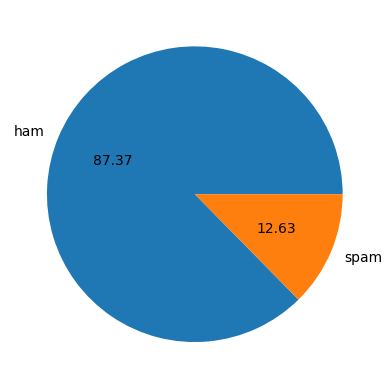

In [17]:
#plotting a pie chart to depict label devision
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [18]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go-until-jurong-point,-crazy..-Available-only-...",111
1,0,Ok-lar...-Joking-wif-u-oni...,29
2,1,Free-entry-in-2-a-wkly-comp-to-win-FA-Cup-fina...,155
3,0,U-dun-say-so-early-hor...-U-c-already-then-say...,49
4,0,"Nah-I-don't-think-he-goes-to-usf,-he-lives-aro...",61


In [19]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go-until-jurong-point,-crazy..-Available-only-...",111,8
1,0,Ok-lar...-Joking-wif-u-oni...,29,4
2,1,Free-entry-in-2-a-wkly-comp-to-win-FA-Cup-fina...,155,8
3,0,U-dun-say-so-early-hor...-U-c-already-then-say...,49,4
4,0,"Nah-I-don't-think-he-goes-to-usf,-he-lives-aro...",61,3


In [20]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go-until-jurong-point,-crazy..-Available-only-...",111,8,1
1,0,Ok-lar...-Joking-wif-u-oni...,29,4,1
2,1,Free-entry-in-2-a-wkly-comp-to-win-FA-Cup-fina...,155,8,1
3,0,U-dun-say-so-early-hor...-U-c-already-then-say...,49,4,1
4,0,"Nah-I-don't-think-he-goes-to-usf,-he-lives-aro...",61,3,1


In [21]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.180112,4.548655,1.023022
std,58.387036,4.996865,0.149987
min,2.000000,1.000000,1.000000
25%,36.000000,2.000000,1.000000
50%,61.000000,3.000000,1.000000
75%,117.000000,6.000000,1.000000
max,910.000000,168.000000,2.000000


In [22]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.568202,4.374225,1.023251
std,56.402791,5.107820,0.150715
min,2.000000,1.000000,1.000000
25%,34.000000,2.000000,1.000000
50%,52.000000,3.000000,1.000000
75%,90.000000,5.000000,1.000000
max,910.000000,168.000000,2.000000


In [23]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,138.738132,5.754977,1.021440
std,30.418104,3.946497,0.144955
min,13.000000,1.000000,1.000000
25%,132.000000,3.000000,1.000000
50%,149.000000,5.000000,1.000000
75%,158.000000,8.000000,1.000000
max,226.000000,30.000000,2.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

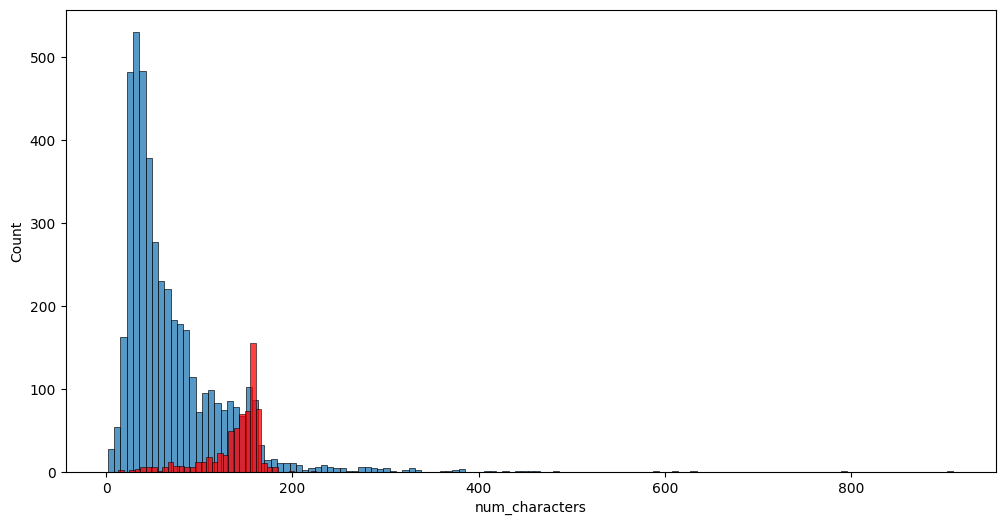

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

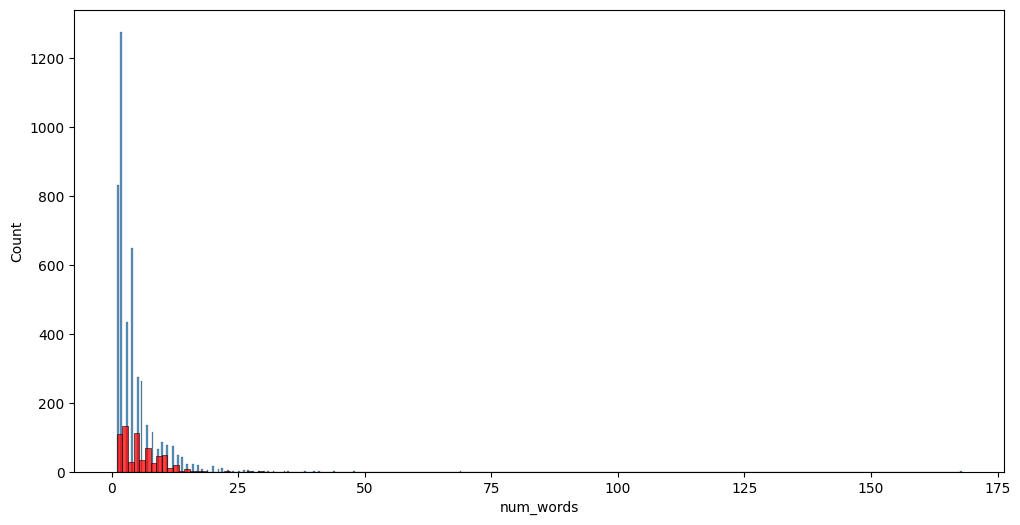

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<AxesSubplot:>

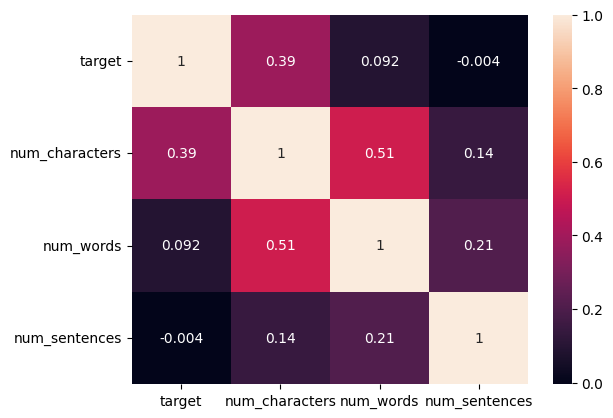

In [26]:
sns.heatmap(df.corr(),annot=True)

In [27]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def preprocess_and_transform_text(df, column_name):
    # Create a new DataFrame to store the transformed text
    transformed_df = df.copy()

    # Remove any URLs in the text
    transformed_df['transformed_text'] = df[column_name].apply(lambda x: re.sub(r'http\S+', '', x))

    # Replace hyphens with spaces
    transformed_df['transformed_text'] = transformed_df['transformed_text'].apply(lambda x: x.replace('-', ' '))

    # Remove any punctuation and convert to lowercase
    transformed_df['transformed_text'] = transformed_df['transformed_text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).lower())

    # Tokenize the text into individual words
    transformed_df['transformed_text'] = transformed_df['transformed_text'].apply(lambda x: nltk.word_tokenize(x))

    # Remove stop words from the text
    stop_words = set(stopwords.words('english'))
    transformed_df['transformed_text'] = transformed_df['transformed_text'].apply(lambda x: [word for word in x if word not in stop_words])

    # Apply stemming to the text
    stemmer = PorterStemmer()
    transformed_df['transformed_text'] = transformed_df['transformed_text'].apply(lambda x: [stemmer.stem(word) for word in x])

    # Join the words back into a single string with spaces between them
    transformed_df['transformed_text'] = transformed_df['transformed_text'].apply(lambda x: ' '.join(x))

    # Reset the index of the transformed DataFrame to avoid the SettingWithCopyWarning
    transformed_df.reset_index(drop=True, inplace=True)

    # Return the transformed DataFrame
    return transformed_df

In [28]:
preprocessed_df = preprocess_and_transform_text(df, 'text')

In [29]:
preprocessed_df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go-until-jurong-point,-crazy..-Available-only-...",111,8,1,go jurong point crazi avail bugi n great world...
1,0,Ok-lar...-Joking-wif-u-oni...,29,4,1,ok lar joke wif u oni
2,1,Free-entry-in-2-a-wkly-comp-to-win-FA-Cup-fina...,155,8,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U-dun-say-so-early-hor...-U-c-already-then-say...,49,4,1,u dun say earli hor u c alreadi say
4,0,"Nah-I-don't-think-he-goes-to-usf,-he-lives-aro...",61,3,1,nah dont think goe usf live around though


In [30]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [31]:
spam_wc = wc.generate(preprocessed_df[preprocessed_df['target'] == 1]['transformed_text'].str.cat(sep=" "))

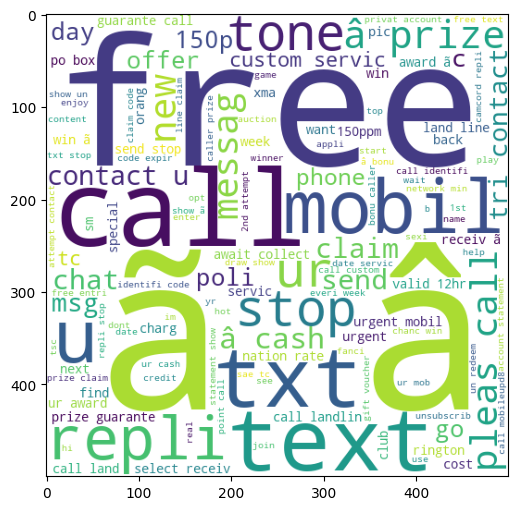

In [32]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

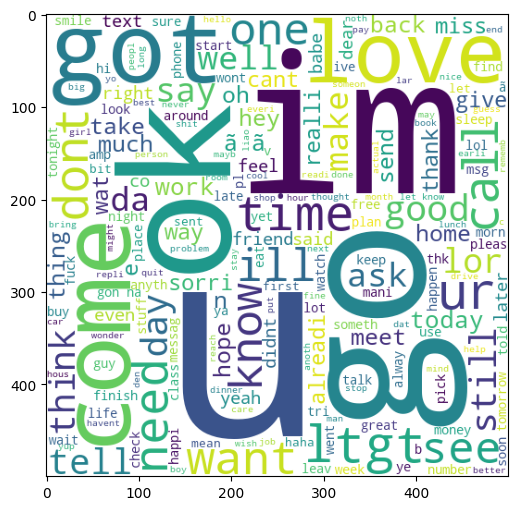

In [33]:
ham_wc = wc.generate(preprocessed_df[preprocessed_df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [34]:
preprocessed_df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go-until-jurong-point,-crazy..-Available-only-...",111,8,1,go jurong point crazi avail bugi n great world...
1,0,Ok-lar...-Joking-wif-u-oni...,29,4,1,ok lar joke wif u oni
2,1,Free-entry-in-2-a-wkly-comp-to-win-FA-Cup-fina...,155,8,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U-dun-say-so-early-hor...-U-c-already-then-say...,49,4,1,u dun say earli hor u c alreadi say
4,0,"Nah-I-don't-think-he-goes-to-usf,-he-lives-aro...",61,3,1,nah dont think goe usf live around though


In [35]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [36]:
X = tfidf.fit_transform(preprocessed_df['transformed_text']).toarray()


In [37]:
X.shape

(5169, 3000)

In [38]:
y = preprocessed_df['target'].values
print(y)

[0 0 1 ... 0 0 0]


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [40]:
# Show the results of the split
print("\n")
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("\n")




Training set has 4135 samples.
Testing set has 1034 samples.




In [41]:
import numpy as np
# Define a function to perform random label flipping
def random_label_flip(y, p):
    y_flipped = np.copy(y)
    mask = np.random.random(size=y.shape) < p
    y_flipped[mask] = 1 - y_flipped[mask]
    return y_flipped

In [42]:
# Define the range of attack probabilities to test
attack_probabilities = [0.0, 0.375]

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
# Define the machine learning algorithms to compare
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier()}

Testing K-Nearest Neighbors...
Accuracy with attack probability 0.0: 0.9042553191489362
F1 score with attack probability 0.0: 0.4406779661016949
Accuracy on original dataset: 0.9042553191489362
F1 score on original dataset: 0.4406779661016949
Accuracy with attack probability 0.375: 0.6673114119922631
F1 score with attack probability 0.375: 0.2711864406779661
Accuracy on original dataset: 0.9042553191489362
F1 score on original dataset: 0.4406779661016949
Testing Support Vector Machine...
Accuracy with attack probability 0.0: 0.9709864603481625
F1 score with attack probability 0.0: 0.8809523809523809
Accuracy on original dataset: 0.9709864603481625
F1 score on original dataset: 0.8809523809523809
Accuracy with attack probability 0.375: 0.8684719535783365
F1 score with attack probability 0.375: 0.592814371257485
Accuracy on original dataset: 0.9709864603481625
F1 score on original dataset: 0.8809523809523809
Testing Multinomial Naive Bayes...
Accuracy with attack probability 0.0: 0.97388

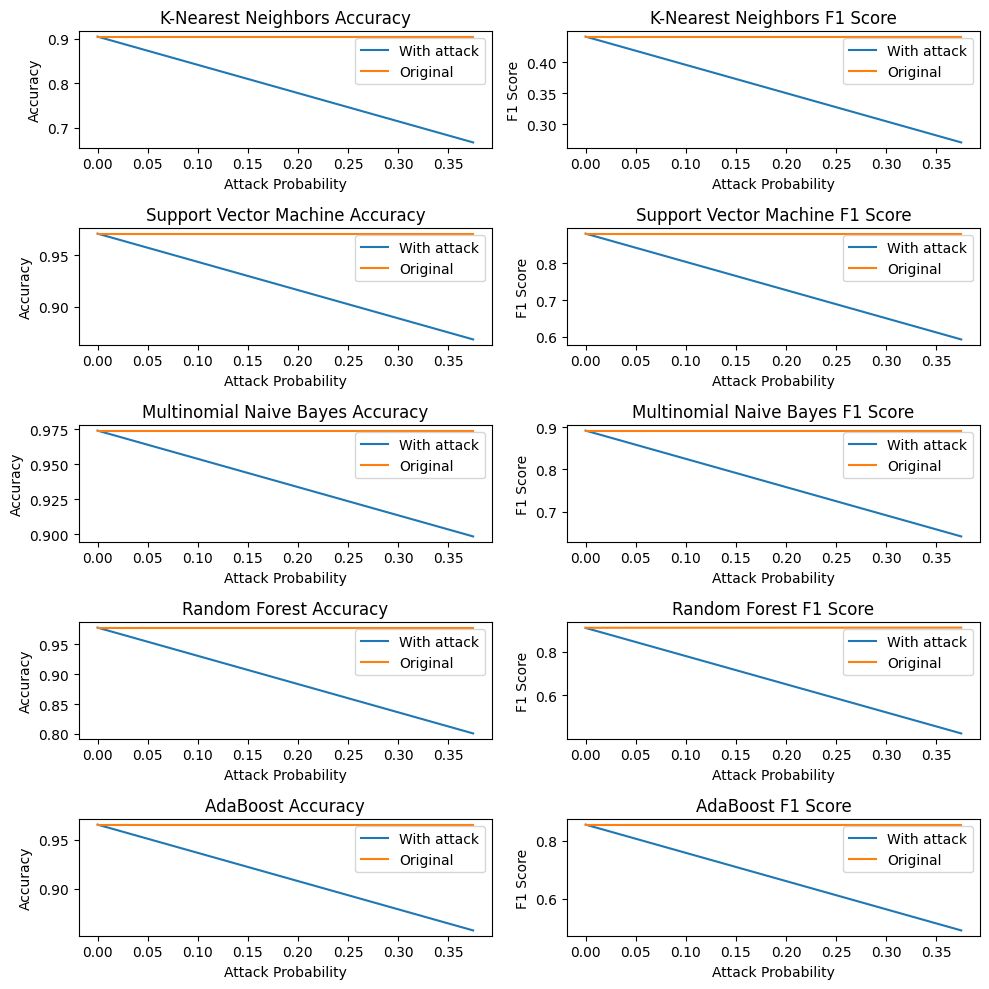

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

fig, axs = plt.subplots(nrows=len(models), ncols=2, figsize=(10, 10))

for i, (name, model) in enumerate(models.items()):
    print(f"Testing {name}...")
    results_acc = [0] * len(attack_probabilities)
    results_f1 = [0] * len(attack_probabilities)
    results_original_acc = [0] * len(attack_probabilities)
    results_original_f1 = [0] * len(attack_probabilities)
    for j, p in enumerate(attack_probabilities):
        y_train_flipped = random_label_flip(y_train, p)
        model.fit(X_train, y_train_flipped)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results_acc[j] = accuracy
        results_f1[j] = f1
        print(f"Accuracy with attack probability {p}: {accuracy}")
        print(f"F1 score with attack probability {p}: {f1}")
        # Evaluate model on original dataset
        model.fit(X_train, y_train)
        y_pred_original = model.predict(X_test)
        accuracy_original = accuracy_score(y_test, y_pred_original)
        f1_original = f1_score(y_test, y_pred_original)
        results_original_acc[j] = accuracy_original
        results_original_f1[j] = f1_original
        print(f"Accuracy on original dataset: {accuracy_original}")
        print(f"F1 score on original dataset: {f1_original}")
    axs[i, 0].set_title(f"{name} Accuracy")
    axs[i, 0].plot(attack_probabilities, results_acc, label="With attack")
    axs[i, 0].plot(attack_probabilities, results_original_acc, label="Original")
    axs[i, 0].set_xlabel("Attack Probability")
    axs[i, 0].set_ylabel("Accuracy")
    axs[i, 0].legend()
    
    axs[i, 1].set_title(f"{name} F1 Score")
    axs[i, 1].plot(attack_probabilities, results_f1, label="With attack")
    axs[i, 1].plot(attack_probabilities, results_original_f1, label="Original")
    axs[i, 1].set_xlabel("Attack Probability")
    axs[i, 1].set_ylabel("F1 Score")
    axs[i, 1].legend()

plt.tight_layout()
plt.show()
